# Linearna regresija

**"Linear approach to modelling the relationship between a scalar response and one or more explanatory variables"**

# Pregled
* Nadgledano učenje
* Prosta linearna regresija
* Višestruka linearna regresija: više feature-a
* Polinomijalna regresija: polinom umesto linearne funkcije

#Pre svega, import

In [0]:
import tensorflow as tf 

# Nadgledano učenje

**Nadgledano učenje** (induktivno učenje, supervised learning) se bavi problemima u mašinskom učenju gde treba otkriti vezu između ulaznih i izlaznih podataka tj. "naučiti" funkciju koja mapira ulaze na izlaze, na osnovu datog skupa parova $(ulaz, izlaz)$. Tu funkciju nazivamo **hipoteza**. 

Dva glavna tipa problema su **regresija** (hipoteza je neprekidna funkcija) i **klasifikacija** (hipoteza je diskretna funkcija).

[Više o nadgledanom učenju](https://mcerovic.github.io/notes/SupervisedLearning/index.html)




# Linearna regresija

* **Linearna regresija** (Linear Regression) je jedna od najpoznatijih metoda nadgledanog učenja
* Za početak bavićemo se **prostom** linearnom regresijom  (simple LR, univariate LR)
  * Imamo jednu ulaznu promenljivu (**feature**) i jednu izlaznu promenljivu
* **Notacija**:
  * $x$: Ulazni podaci (features), $x_i$: Ulazni podatak iz i-tog trening uzorka (sempla)
  * $y$: Izlazni podaci (labels), $y_i$: Izlazni podatak iz i-tog trening uzorka (sempla)
  * $m$: Veličina trening skupa - broj semplova
* **Hipoteza (model)**: $ h_\theta(x) = \theta_0 + \theta_1 x $
  * Linearna funkcija!
  * "Učimo" parametre $\theta_0$ i $\theta_1$, tj. modifikujemo ih tako da budu "što bolji"
  * Kako znamo kada su "bolji"?
* **Funkcija troška** (kriterijumska funkcija, funkcija koštanja, cost function, loss function): **MSE** (srednje kvadratno odstupanje, mean squared error)
  * $J(\theta_0, \theta_1) = \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x_i) - y_i)^2$ (nekada $\frac{1}{2m}$ zbog lepšeg izvoda)
 * Dakle, menjamo $\theta_0$ i $\theta_1$ tako da **minimizujemo** funkciju troška, kako?
* **Optimizacija: gradijentni spust** (gradient descent): iterativni optimizacioni metod za minimizaciju funkcije
    * Određuje tačno u kom smeru treba da se krećemo da što efikasnije poboljšamo vrednosti parametara
    * Varijante: Batch, Minibatch, Stochastic
* [Više o linearnoj regresiji](https://mcerovic.github.io/notes/LinearRegression/index.html)
* [Više o gradijentnom spustu](https://mcerovic.github.io/notes/GradientDescent/index.html)

# Primer: predviđanje očekivanog životnog veka (OŽV) na osnovu nataliteta

Istraživanje od strane World Bank:  [World Development Indicators](https://datacatalog.worldbank.org/dataset/world-development-indicators).

[Prateća vizualizacija](https://www.google.com/publicdata/explore?ds=d5bncppjof8f9_&ctype=b&strail=false&nselm=s&met_x=sp_dyn_le00_in&scale_x=lin&ind_x=false&met_y=sp_dyn_tfrt_in&scale_y=lin&ind_y=false&met_s=sp_pop_totl&scale_s=lin&ind_s=false&dimp_c=country:region&ifdim=country&iconSize=0.5&uniSize=0.035#!ctype=b&strail=false&bcs=d&nselm=s&met_x=sp_dyn_le00_in&scale_x=lin&ind_x=false&met_y=sp_dyn_tfrt_in&scale_y=lin&ind_y=false&met_s=sp_pop_totl&scale_s=lin&ind_s=false&dimp_c=country:region&ifdim=country&pit=1421395200000&hl=en_US&dl=en_US&ind=false)

Ovo ukazuje na određenu korelaciju (veći natalitet => manji životni vek). Pokušaćemo da kvantifikujemo ovaj odnos tj. da naučimo funkciju $OŽV = f(natalitet)$.


Epoha: 10/100| Avg loss: 373.52
Epoha: 20/100| Avg loss: 111.84
Epoha: 30/100| Avg loss: 49.70
Epoha: 40/100| Avg loss: 35.02
Epoha: 50/100| Avg loss: 31.59
Epoha: 60/100| Avg loss: 30.80
Epoha: 70/100| Avg loss: 30.63
Epoha: 80/100| Avg loss: 30.60
Epoha: 90/100| Avg loss: 30.59
Epoha: 100/100| Avg loss: 30.59
theta_0 = 85.73, theta_1 = -5.97


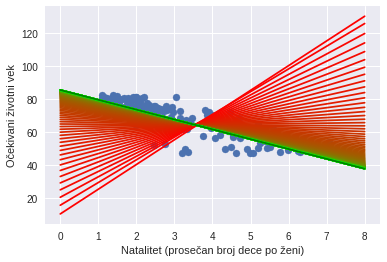

Finalni loss: 30.84


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

tf.reset_default_graph()

# Korak 1: učitavanje i normalizacija podataka
# Često ćemo koristiti numpy zbog gotovih funkcija za parsiranje.
filename = 'birth_life_2010.tsv'
data = dict()
data['x'], data['y'] = np.loadtxt(filename, delimiter='\t', unpack=True, 
                                  skiprows=1, usecols=(1, 2))
# print(len(data['x']), len(data['y']))

# Nasumično mešanje podataka: uvek dobra ideja da se eliminiše bilo koja 
# pravilnost koja potencijalno postoji u ulaznom fajlu.
nb_samples = len(data['x'])
indices = np.random.permutation(nb_samples)
data['x'] = data['x'][indices]
data['y'] = data['y'][indices]

# Normalizacija: ubrzava gradijentni spust i čini sve promenljive ravnopravnim.
# Često dobra ideja, sada ćemo je izostaviti zarad jasnije vizualizacije.
# data['x'] = (data['x'] - np.mean(data['x'])) / np.std(data['x'])
# data['y'] = (data['y'] - np.mean(data['y'])) / np.std(data['y'])
plt.scatter(data['x'], data['y'])
plt.xlabel('Natalitet (prosečan broj dece po ženi)')
plt.ylabel('Očekivani životni vek')

# Korak 2: Model - linearna regresija
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
theta_0 = tf.Variable(0.0)
theta_1 = tf.Variable(0.0)
hyp = tf.add(theta_0, tf.multiply(theta_1, X))

# Korak 3: Funkcija troška (MSE) i optimizacija
# tf.train.Optimizer je porodica klasa koja generiše op-ove koji nemaju povratnu
# vrednost ali pri svakom pokretanju vrše iteraciju algoritma za minimizaciju
# određene promenljive.
loss = tf.reduce_mean(tf.square(hyp - Y))
opt_op = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

# Korak 4: Trening
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  # Izvršavamo 100 epoha treninga (epoha = prolaz kroz sve podatke).
  nb_epochs = 100
  for epoch in range(nb_epochs):
    
    # Stochastic Gradient Descent
    epoch_loss = 0
    for sample in range(nb_samples):
      feed = {X: data['x'][sample], Y: data['y'][sample]}
      _, curr_loss = sess.run([opt_op, loss], feed_dict=feed)
      epoch_loss += curr_loss
    
    # U svakoj desetoj epohi ispisujemo prosečan loss.
    epoch_loss /= nb_samples
    if (epoch + 1) % 10 == 0:
      print('Epoha: {}/{}| Avg loss: {:.2f}'.format(epoch+1, nb_epochs, 
                                              epoch_loss))
    
    # Dodajemo na grafik sve usputne hipoteze da prikažemo napredak.
    theta_0_val, theta_1_val = sess.run([theta_0, theta_1])
    xs = np.linspace(0, 8, 100)
    plt.plot(xs.tolist(), (theta_0_val + theta_1_val * xs).tolist(), 
            color=(1 - epoch / nb_epochs, epoch / nb_epochs, 0))
  
  # Ispisujemo i plotujemo finalnu vrednost parametara.
  theta_0_val, theta_1_val = sess.run([theta_0, theta_1])
  print('theta_0 = {:.2f}, theta_1 = {:.2f}'.format(theta_0_val, theta_1_val))
  xs = np.linspace(0, 8, 100)
  plt.plot(xs.tolist(), (theta_0_val + theta_1_val * xs).tolist(), color='g')
  plt.show()
  
  # Ispisujemo finalni MSE.
  final_loss = sess.run(loss, feed_dict={X: data['x'], Y: data['y']})
  print('Finalni loss: {:.2f}'.format(final_loss))



# Višestruka linearna regresija

* **Višestruka linearna regresija** (Multiple Linear Regression, nekad i Multivariate Linear Regression) je ime za linearnu regresiju gde radimo sa više od jednim ulaznim feature-om.
* Kao primer radićemo sa datasetom sa sajta **kaggle** pod imenom [**80 cereals**](https://www.kaggle.com/crawford/80-cereals).
* Dati su razni podaci o 80 tipova cerealija sa kojima možemo raditi svašta... Recimo da želimo da predvidimo promenljivu **calories** na osnovu promenljivih **fat** i **sugars**.


---



* Dodatna notacija: $x^{(i)}$ je i-ti feature
* Hipoteza je sada: $ h_\theta(x) = bias + w_0 x^{(0)} + w_1 x^{(1)} + ... + w_{n-1} x^{(n-1)} $
  * I dalje linearna funkcija samo po više promenlijvih! Umesto fitovanja prave fitujemo ravan tj. hiperravan u određenom broju dimenzija.
  * "Učimo" parametre $w$!
* Funkcija troška ostaje ista, kao i metod optimizacije.


---


* Kod ćemo pisati generički tako da radi sa bilo kojim brojem feature-a.
* Poći ćemo od prethodnog koda.


In [0]:
# TODO

# Polinomijalna regresija

* **Polinomijalna regresija** (Polynomial Regression) je naziv za regresiju u kojoj umesto linearne funkcije, učimo polinom nekog stepena.
* Izraženo preko višestruke linearne regresije: od stepenova feature-a pravimo nove feature i onda radimo istu proceduru kao u višestrukoj regresiji.
* Cela postavka dakle ostaje ista kao u višestrukoj linearnoj regresiji, samo je priprema feature-a drukčija.


---

* Izmenimo primer sa natalitetom i OŽV da podržimo polinome proizvoljnog stepena i posmatrajmo kako to utiče na rezultat.

In [0]:
# TODO